In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [2]:
df  = pd.read_csv('cars_data.csv')

Do some basic analytics in the dataset : Check shape info and cehck the head to get the glimpse of the dataset and understand columns

In [3]:
df.shape

(46639, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46639 entries, 0 to 46638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          46639 non-null  object 
 1   model         46639 non-null  object 
 2   year          46639 non-null  int64  
 3   price         46639 non-null  float64
 4   mileage       46437 non-null  float64
 5   fuel type     46638 non-null  object 
 6   engine size   45987 non-null  float64
 7   Color         46491 non-null  object 
 8   body type     46485 non-null  object 
 9   owners        41056 non-null  float64
 10  transmission  46639 non-null  object 
 11  seats         27433 non-null  float64
 12  fuel economy  25860 non-null  float64
 13  max speed     21831 non-null  float64
 14  engine power  30430 non-null  float64
 15  Seller Type   46639 non-null  object 
 16  Location      46639 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 6.0+ MB


In [5]:
df.head()

make model  year    price   mileage fuel type  engine size  Color  \
0  Peugeot   208  2017  14500.0   26173.0    Diesel          1.6   Blue   
1  Renault   100  2014   8950.0   65516.0    Diesel          2.0  White   
2  Renault   100  2015   9975.0   37283.0    Diesel          1.5  White   
3  Renault   100  2015  11250.0  101000.0    Diesel          1.6   Gray   
4  Peugeot   308  2016   9500.0  125015.0    Diesel          1.6   Blue   

   body type  owners transmission  seats  fuel economy  max speed  \
0  Hatchback     1.0       Manual    5.0          81.0      116.0   
1        Van     2.0       Manual    3.0           NaN        NaN   
2      Coupe     1.0       Manual    5.0           NaN        NaN   
3        Van     1.0       Manual    3.0           NaN        NaN   
4  Hatchback     2.0       Manual    5.0          79.0      116.0   

   engine power Seller Type  Location  
0          99.0      Dealer   Donegal  
1           NaN      Dealer    Galway  
2           NaN      Dealer   Wexford  
3           NaN      Dealer  Longford  
4          99.0      Dealer      Cork

This dataset has 17 columns and around : 46639 rows in total. while someof the columns are number based some columns are string and other obect types. 

Lets check for the null and duplicate values in the dataframe. 


In [6]:
df.isnull().sum()

make                0
model               0
year                0
price               0
mileage           202
fuel type           1
engine size       652
Color             148
body type         154
owners           5583
transmission        0
seats           19206
fuel economy    20779
max speed       24808
engine power    16209
Seller Type         0
Location            0
dtype: int64

Some of the columns do have the null values. lets check them and try to impude them and in an case if it is not possible to impude the values we would delete them.

In [7]:
# For impuding lets calculate the median of the dataset as mean may deviade if the datast contains the outliers. 

seat_median = df['seats'].median()
fuel_economy_median  = df['fuel economy'].median()
max_speed_median = df['max speed'].median()
engine_power_median  = df['engine power'].median()

# Lets print them to take a look : 
print(seat_median)
print(fuel_economy_median)
print(max_speed_median)
print(engine_power_median)


5.0
63.0
117.0
115.0


In [8]:
# Filling the values with the calcualted medians above : 

df['seats'].fillna(seat_median , inplace=True)
df['fuel economy'].fillna(fuel_economy_median , inplace=True)
df['max speed'].fillna(max_speed_median , inplace=True)
df['engine power'].fillna(engine_power_median , inplace=True)

In [9]:
# Lets check the dataset again and confirm : 
df.isnull().sum()

make               0
model              0
year               0
price              0
mileage          202
fuel type          1
engine size      652
Color            148
body type        154
owners          5583
transmission       0
seats              0
fuel economy       0
max speed          0
engine power       0
Seller Type        0
Location           0
dtype: int64

In [10]:
# Now for the remaining columns the null values are not that much as compared to the size of the dataset so we can delete the datset altogether : 

df = df.dropna()

In [11]:
df.isnull().sum()

make            0
model           0
year            0
price           0
mileage         0
fuel type       0
engine size     0
Color           0
body type       0
owners          0
transmission    0
seats           0
fuel economy    0
max speed       0
engine power    0
Seller Type     0
Location        0
dtype: int64

In [12]:
# Lets check for the duplicate values also for the dataset : 
df.duplicated().sum()

np.int64(678)

In [13]:
#  There are 678 values duplicated so we are deleting them also : 

df.drop_duplicates(inplace=True)

In [14]:
# Lets take lokk at the final cleaned dataset :  and save it for the reference if it is reauired in further analysis : 
df.head()

make model  year    price   mileage fuel type  engine size  Color  \
0  Peugeot   208  2017  14500.0   26173.0    Diesel          1.6   Blue   
1  Renault   100  2014   8950.0   65516.0    Diesel          2.0  White   
2  Renault   100  2015   9975.0   37283.0    Diesel          1.5  White   
3  Renault   100  2015  11250.0  101000.0    Diesel          1.6   Gray   
4  Peugeot   308  2016   9500.0  125015.0    Diesel          1.6   Blue   

   body type  owners transmission  seats  fuel economy  max speed  \
0  Hatchback     1.0       Manual    5.0          81.0      116.0   
1        Van     2.0       Manual    3.0          63.0      117.0   
2      Coupe     1.0       Manual    5.0          63.0      117.0   
3        Van     1.0       Manual    3.0          63.0      117.0   
4  Hatchback     2.0       Manual    5.0          79.0      116.0   

   engine power Seller Type  Location  
0          99.0      Dealer   Donegal  
1         115.0      Dealer    Galway  
2         115.0      Dealer   Wexford  
3         115.0      Dealer  Longford  
4          99.0      Dealer      Cork

In [15]:
df.to_csv('corrected_data.csv')

Now we have cleaned the data lets do analysis : 
1. Univariate analysis : of all the column type and lets see the impact of each column in the dataframe
2. Bivariate analysis or Multivariate analysis : compare two or variables and see how they are connected with each other. 

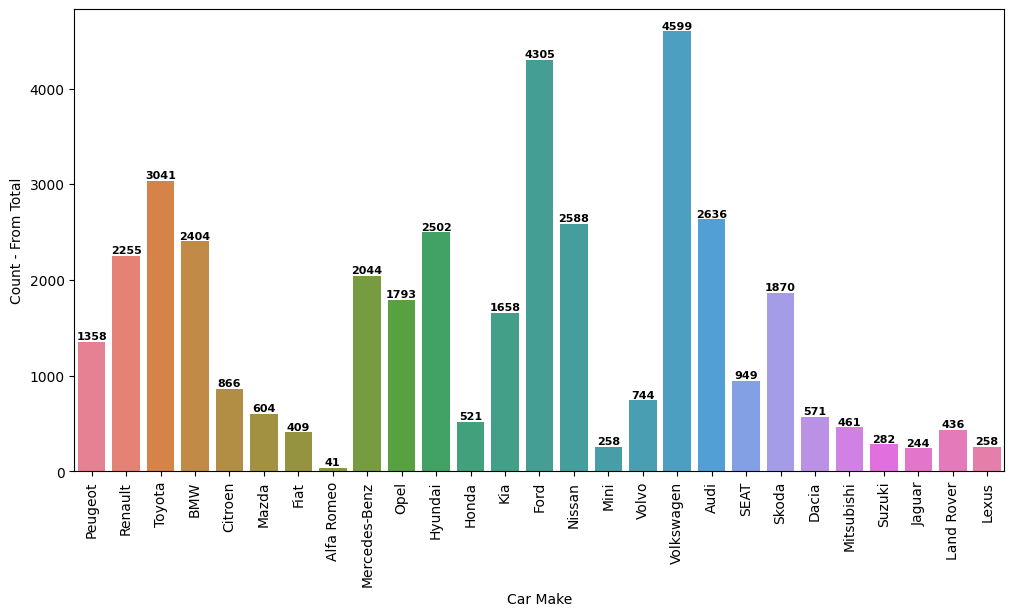

In [16]:
# For the Univariate analysis lets make the count plot : For Car Make : 
plt.figure(figsize=(12 ,6))
ax = sns.countplot(data=df , x='make' , hue = 'make')
plt.xlabel("Car Make")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')
plt.show()

The above grah depicts that in irish market the maximum share is of Volkswagen followed by Ford and then by other promonent members like Nissan, Audi, Hyundai Etc.

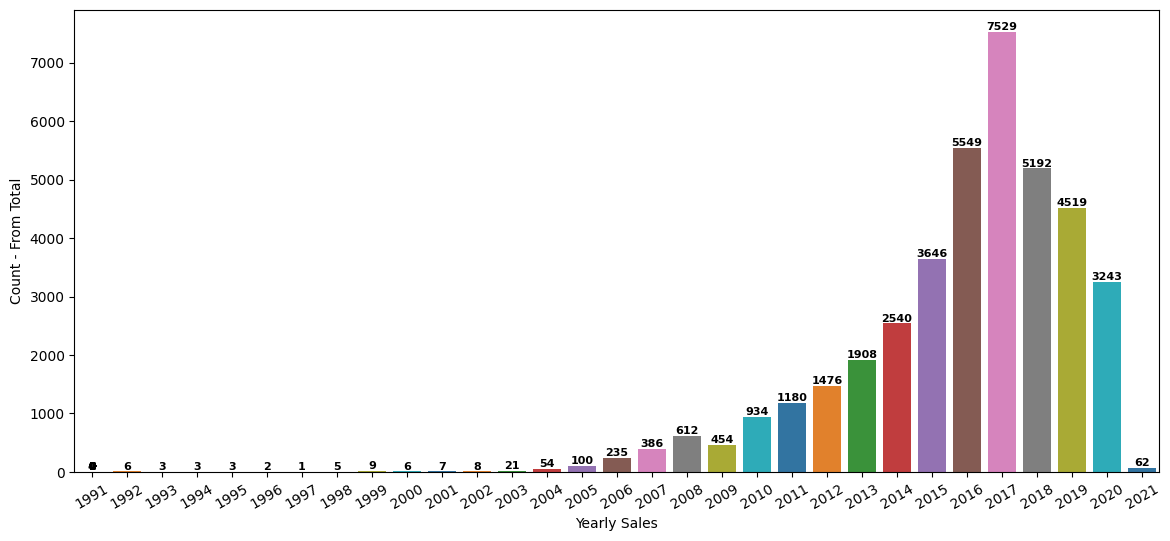

In [17]:
# Lets do the same analysis, For the yearly Sales : 
plt.figure(figsize=(14 ,6))
ax  = sns.countplot(x='year'  , data = df , hue='year' ,palette="tab10")
plt.xlabel("Yearly Sales")
plt.ylabel("Count - From Total")
ax.legend_.remove()
plt.xticks(rotation = 30)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')
plt.show()

As per the graph the 2017 has been the best year for the car sales and then declies over the years decresing by each year.

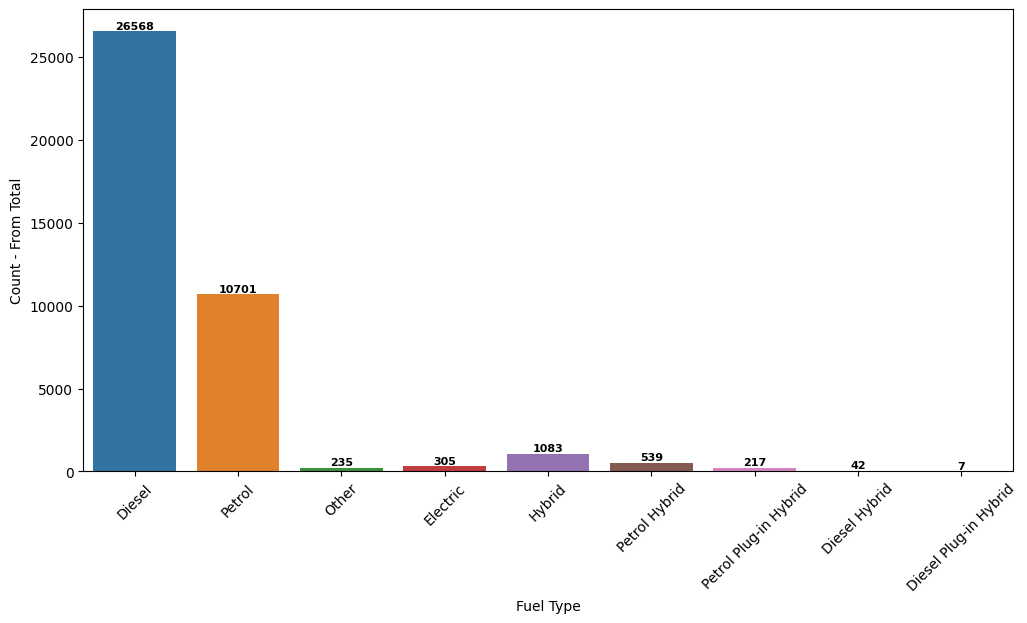

In [18]:
# Lets check for the fuel type : 
plt.figure(figsize=(12 ,6))
ax  = sns.countplot(x='fuel type'  , data = df , hue='fuel type')
plt.xlabel("Fuel Type")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')
plt.show()

Diesel cars are most sold in the market  followed by Petrol and Electric, Hybrid and others.

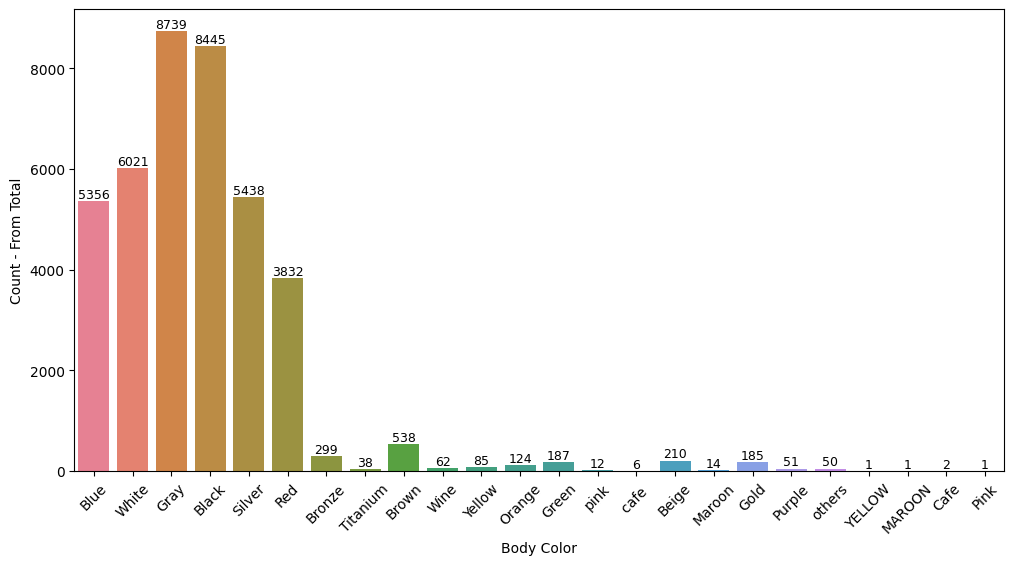

In [19]:
# Lets do the analysis for the Body Color. : 
plt.figure(figsize=(12 ,6))
ax = sns.countplot(x='Color'  , data = df , hue='Color' )
plt.xlabel("Body Color")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='regular', color='black')
plt.show()

The Grph shows the : Gray, Black and white are the most sold body colors

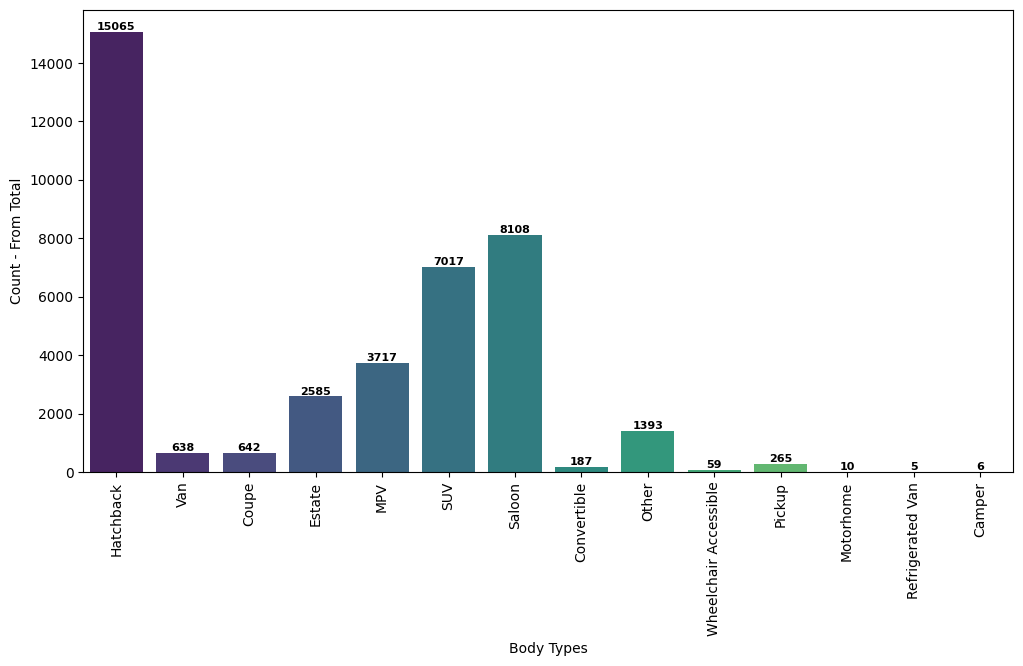

In [20]:
# Lets check for the type of the car : 
plt.figure(figsize=(12 ,6))
ax = sns.countplot(x='body type'  , data = df  , hue='body type' ,palette='viridis')
plt.xlabel("Body Types")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')
plt.show()

The graph shows the hatchback is the is the host selling car in the irish market.

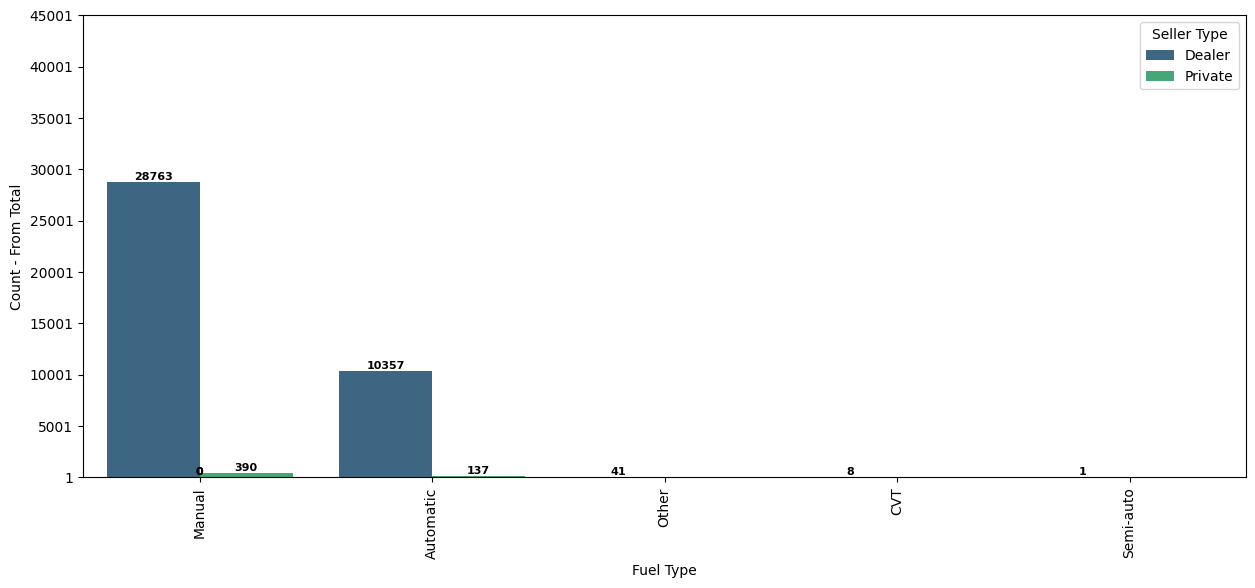

In [21]:
# Lets check the transmission type for the type of cars sold.  : 
plt.figure(figsize=(15 ,6))
ax  = sns.countplot(x='transmission'  , data = df , hue='Seller Type'  , width=.8 ,palette='viridis')
plt.xlabel("Fuel Type")
plt.ylabel("Count - From Total")
plt.xticks(rotation = 90)
ax.set_yticks(np.arange(1, 50000, 5000))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')
plt.show()

Manual transmission is the most propular one for the irish market.

Now  we have checked the car type for each type. Lets then do the analysis for the bivariate analysis. Check 2 or more variables : 


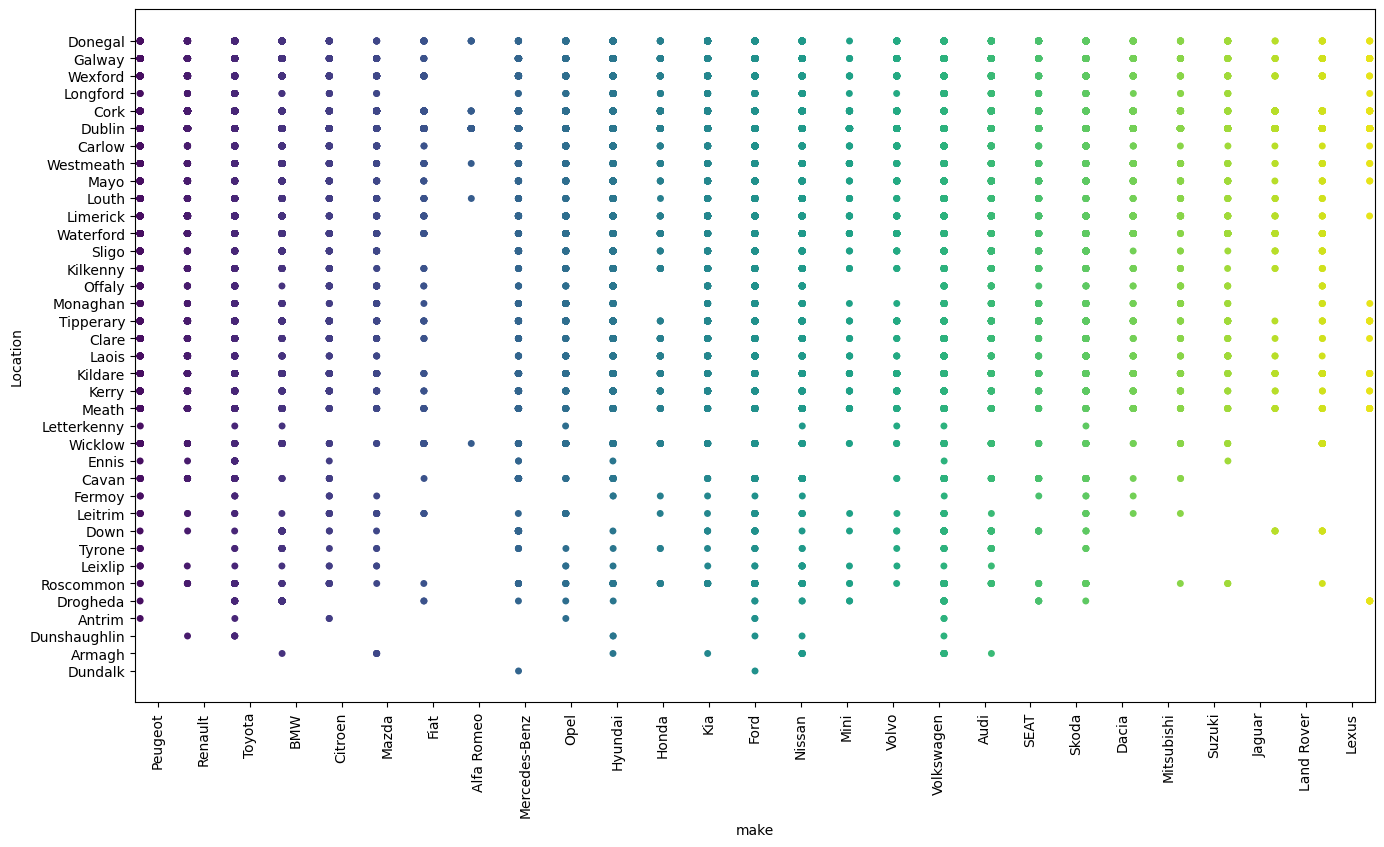

In [22]:
# Lets check for the analysis for : make vs loation ::
plt.figure(figsize=(16 ,9)) 
# sns.scatterplot(data=df , x='make' , y ='Location' )
sns.stripplot(data=df, x='make', y='Location', jitter=True, hue='make', palette='viridis', dodge=True )
plt.xticks(rotation = 90)
plt.show()



In [23]:
# Unable to decude anything from this : Lets make a treemap for the same : 

make_df = df['Location'].value_counts().reset_index()
make_df.columns = ['make', 'count']

fig = px.treemap(make_df, 
                 path=['make'], 
                 values='count', 
                 title='Location Count- Treemap', 
                 color='count', 
                 color_continuous_scale='blues', 
                 hover_data={'make': False, 'count': True}
                )

fig.update_traces(textinfo='label+value', 
                  hovertemplate='Count: %{value}'
                 )

fig.show()


The above grpah shows the Car make and the count wise plot in each region.

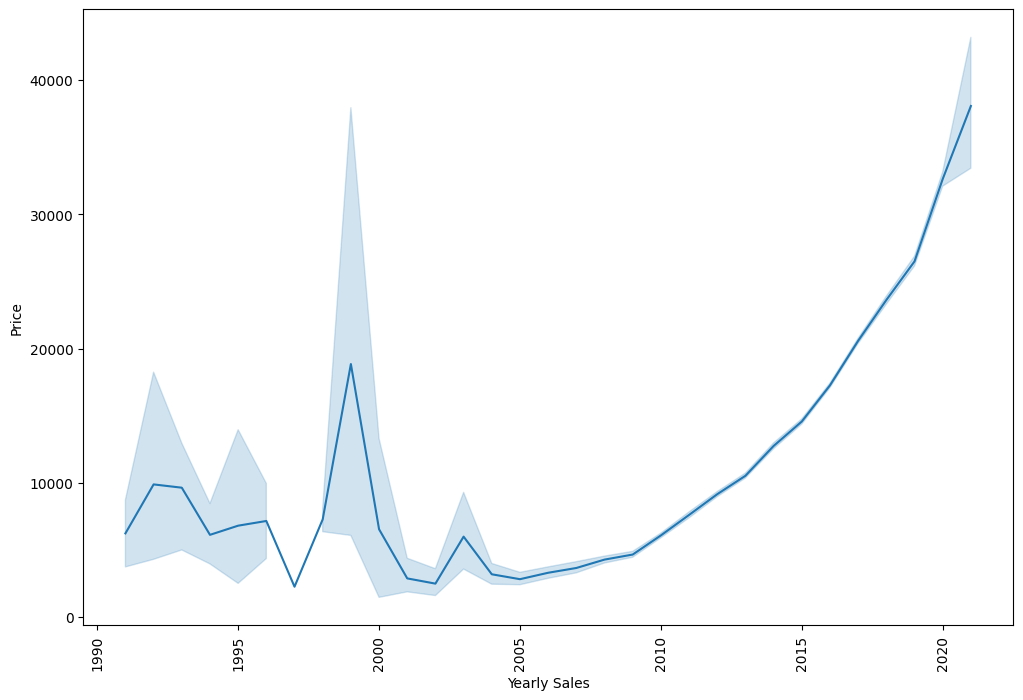

In [24]:
# Lets do sales vs year data and see the selling price of the car per year basis :
plt.figure(figsize=(12 ,8))
sns.lineplot(data=df , x='year' , y='price' ,palette='viridis')
plt.xlabel("Yearly Sales")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.show()

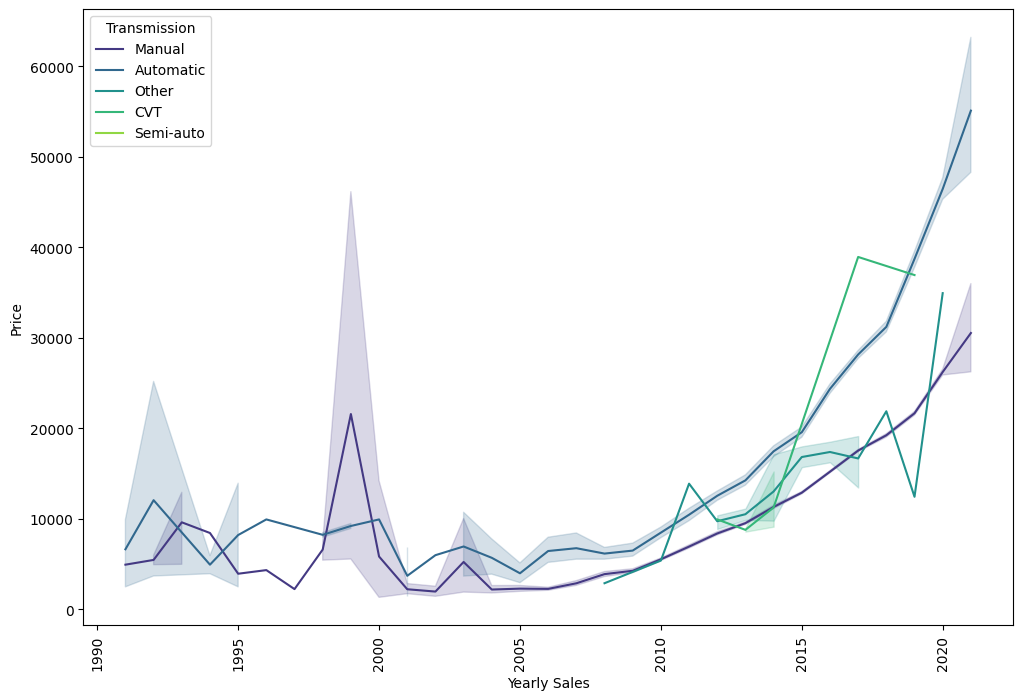

In [25]:
# Lets check based on each make and how each make has done over the years : 
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df, x='year', y='price', hue='transmission' ,palette='viridis')
plt.legend(title ="Transmission")
plt.xlabel("Yearly Sales")
plt.ylabel("Price")
plt.xticks(rotation=90)

plt.show()

The graph shows that the price of the cars inceased over the period of time. 

In [26]:
make_location_df = df.groupby(['make', 'Location']).size().reset_index(name='count')

fig = px.treemap(make_location_df, 
                 path=['make', 'Location'], 
                 values='count', 
                 title='Make vs Location - Treemap',
                 color='count', 
                 color_continuous_scale='blues')

fig.show()


this Graph shows the sale count of cars - Make vs  - County and how much cars with make wise in each county possess.

In [27]:
# Lets check the dataset again  :
df.head()

make model  year    price   mileage fuel type  engine size  Color  \
0  Peugeot   208  2017  14500.0   26173.0    Diesel          1.6   Blue   
1  Renault   100  2014   8950.0   65516.0    Diesel          2.0  White   
2  Renault   100  2015   9975.0   37283.0    Diesel          1.5  White   
3  Renault   100  2015  11250.0  101000.0    Diesel          1.6   Gray   
4  Peugeot   308  2016   9500.0  125015.0    Diesel          1.6   Blue   

   body type  owners transmission  seats  fuel economy  max speed  \
0  Hatchback     1.0       Manual    5.0          81.0      116.0   
1        Van     2.0       Manual    3.0          63.0      117.0   
2      Coupe     1.0       Manual    5.0          63.0      117.0   
3        Van     1.0       Manual    3.0          63.0      117.0   
4  Hatchback     2.0       Manual    5.0          79.0      116.0   

   engine power Seller Type  Location  
0          99.0      Dealer   Donegal  
1         115.0      Dealer    Galway  
2         115.0      Dealer   Wexford  
3         115.0      Dealer  Longford  
4          99.0      Dealer      Cork

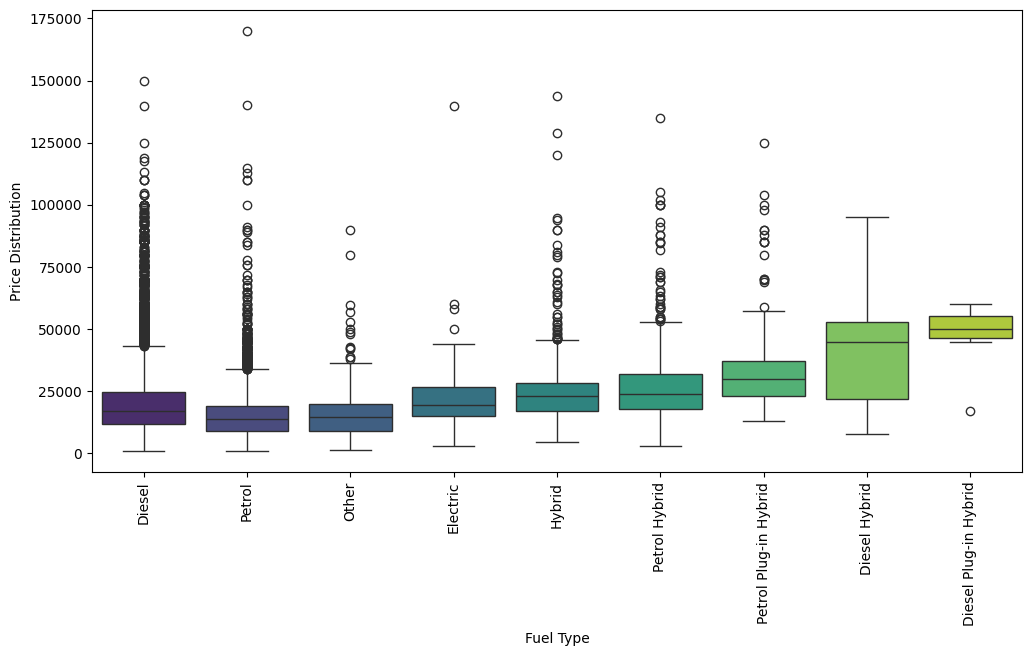

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fuel type', y='price', palette='viridis')

plt.xlabel("Fuel Type")
plt.ylabel("Price Distribution")
plt.xticks(rotation=90)

plt.show()

This Graph shows the Sale Count for the Each Car Category Type

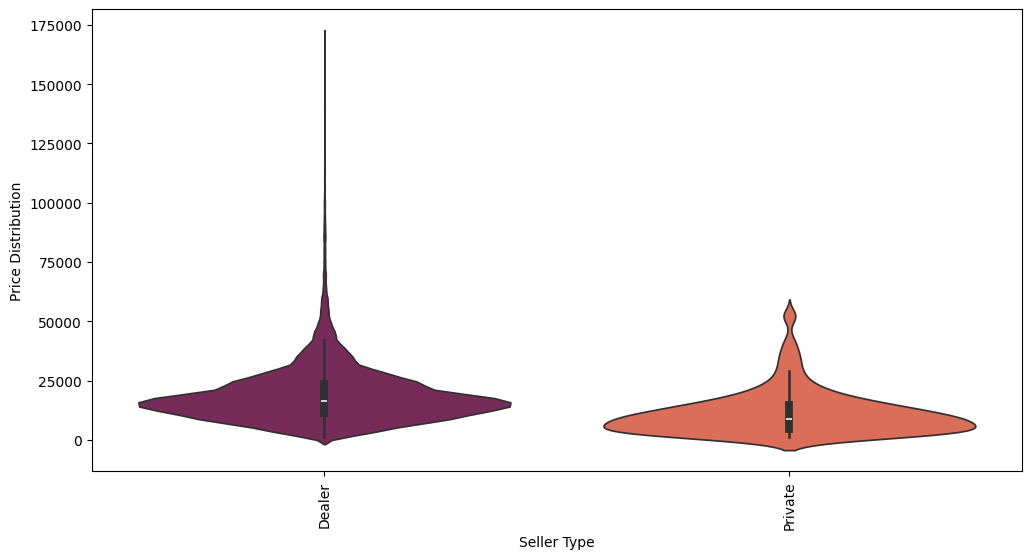

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Seller Type', y='price', palette="rocket")
plt.xlabel("Seller Type")
plt.ylabel("Price Distribution")
plt.xticks(rotation=90)

plt.show()

Graph shows the count for the sale type for - Dealer, Private Sellers

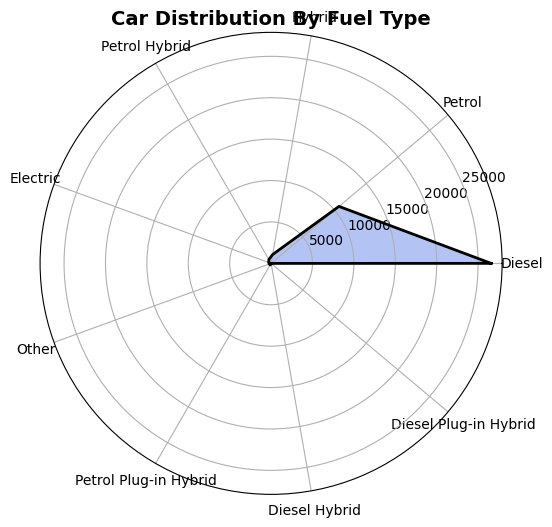

In [30]:
# Lets make a polar plot and check the distribution across market : 
make_counts = df['fuel type'].value_counts()
categories = make_counts.index
values = make_counts.values
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.append(values, values[0])  
angles.append(angles[0])  
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='royalblue', alpha=0.4)
ax.plot(angles, values, color='black', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
plt.title("Car Distribution By Fuel Type", fontsize=14, fontweight='bold')
plt.show()

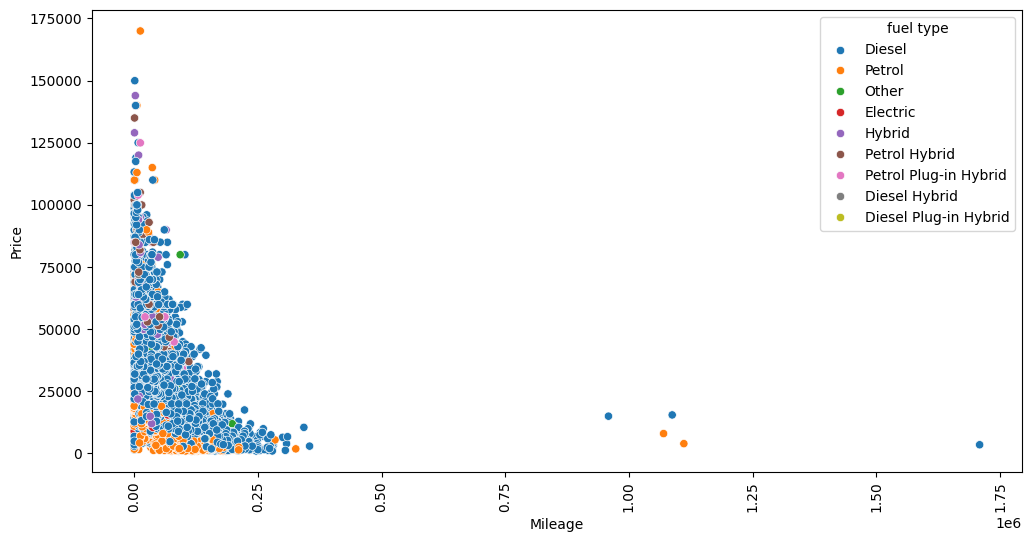

In [31]:
plt.figure(figsize=(12 ,6))
sns.scatterplot(data=df , x='mileage' , y='price' , hue='fuel type')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.show()


This Graph shows the scatter plot and shows the relation between Mileage vs the Price with the categorization fo the fuel type.

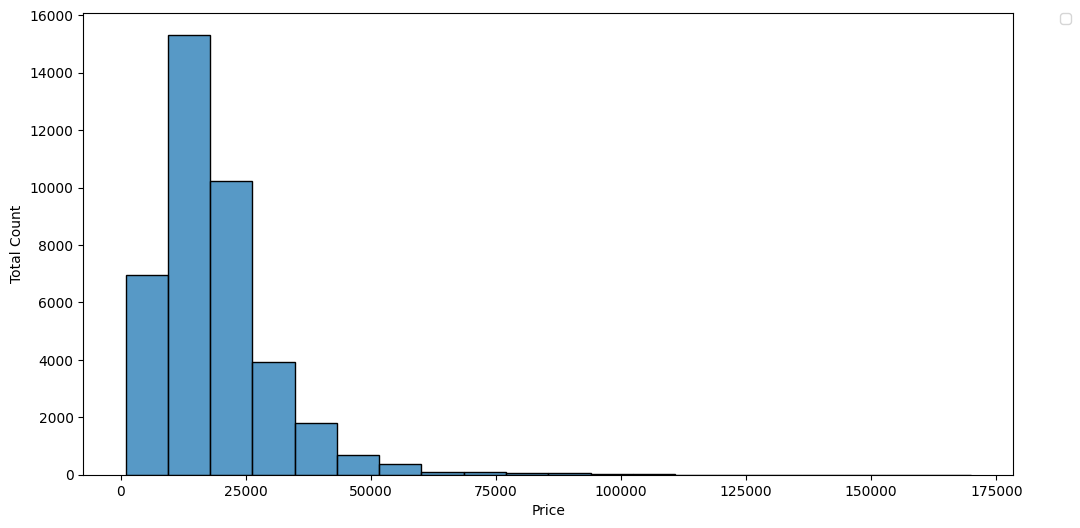

In [32]:
plt.figure(figsize=(12 ,6))
sns.histplot(data = df , x ='price' , bins = 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Price")
plt.ylabel("Total Count")
plt.show()

We now have made inferences of the dataset and we can also proceed for the model.

General steps for the model building would be : 
1. Import Required libraries - In this case would try to make Model usign  the random forest regressor.
2. Check for the outliers and clean the outliers.
3. Change the categorical columns to numerical columns 
4. Make the scaler fir transform for the whole dataseta
5. Make the correlation matrix and check the correlation between the datasets.
6. calculate the VIF for the dataframe and check which VIF and columns would be best to make the machine learning model
7. Calcualte Princial Component Analysis - That way we would be able to verify about VIF
8. Make the model -  Linear Regression and Random Forest we would try two approach for the model. If the regresison model is not possible then would make the classification Model.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

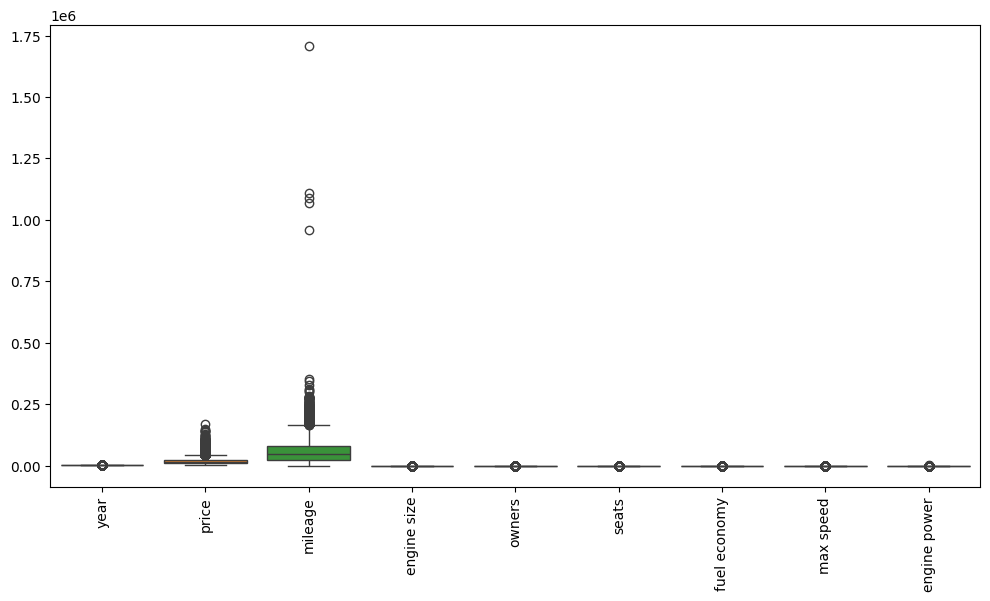

In [34]:
# Lets check for the outliers in the dataset and check the outliers using the boxplot : 
plt.figure(figsize=(12 ,6))
sns.boxplot(data=df)
plt.xticks(rotation = 90)
plt.show()

As per the above graph it is evident that the dataframe has outliers lets check the outliers for each column.

In [35]:
column_names  = ['make', 'year', 'price', 'mileage', 'fuel type', 'engine size',
       'Color', 'body type', 'owners', 'transmission', 'seats', 'fuel economy',
       'max speed', 'engine power', 'Seller Type', 'Location']


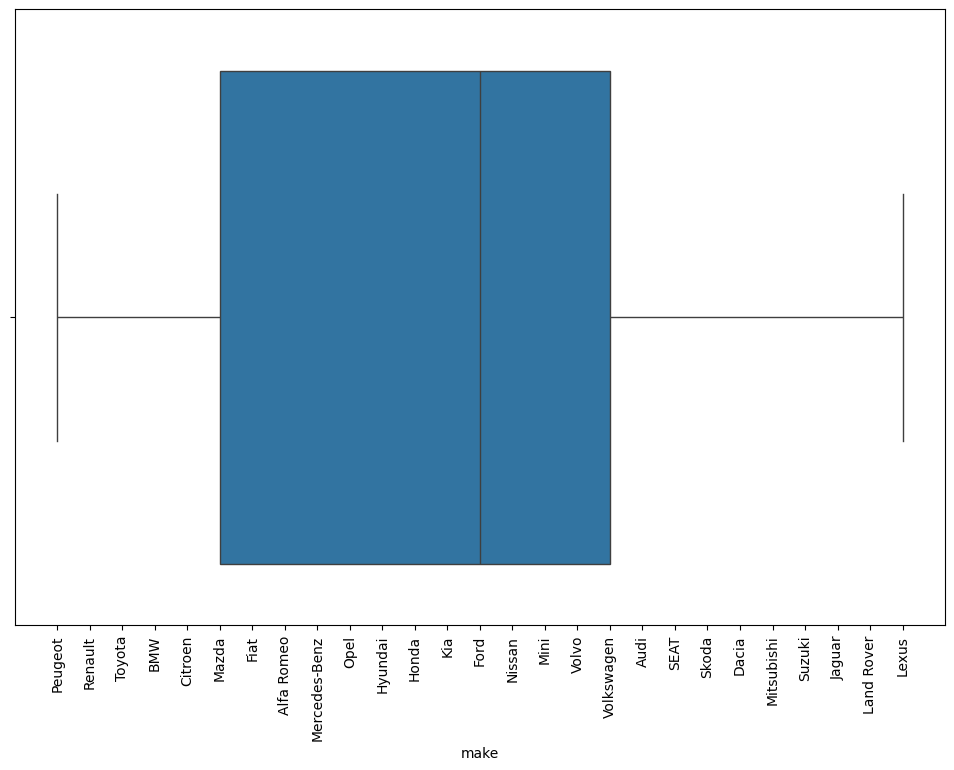

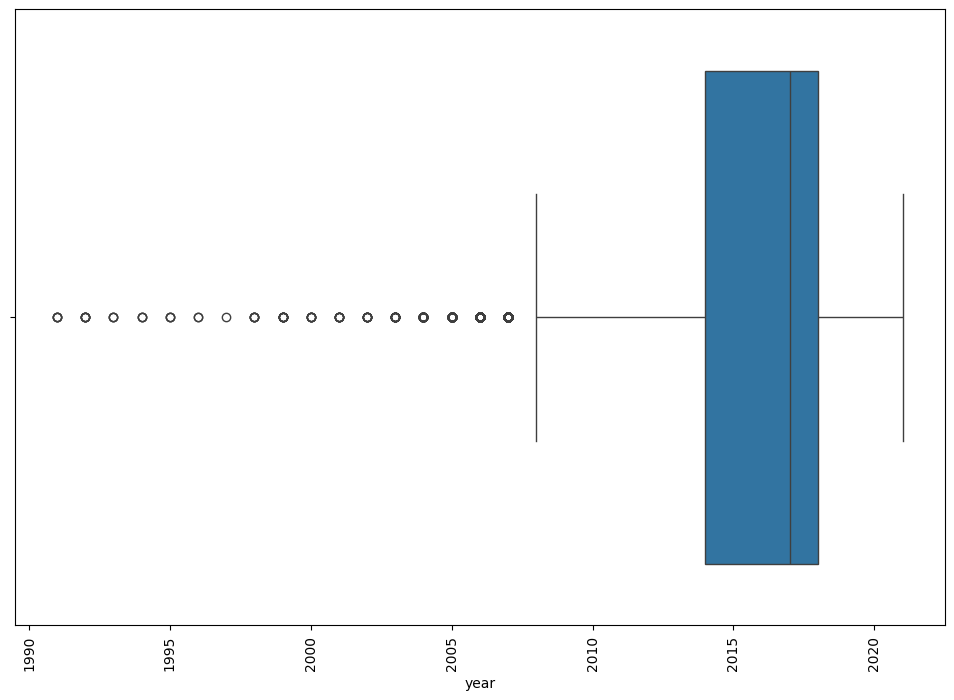

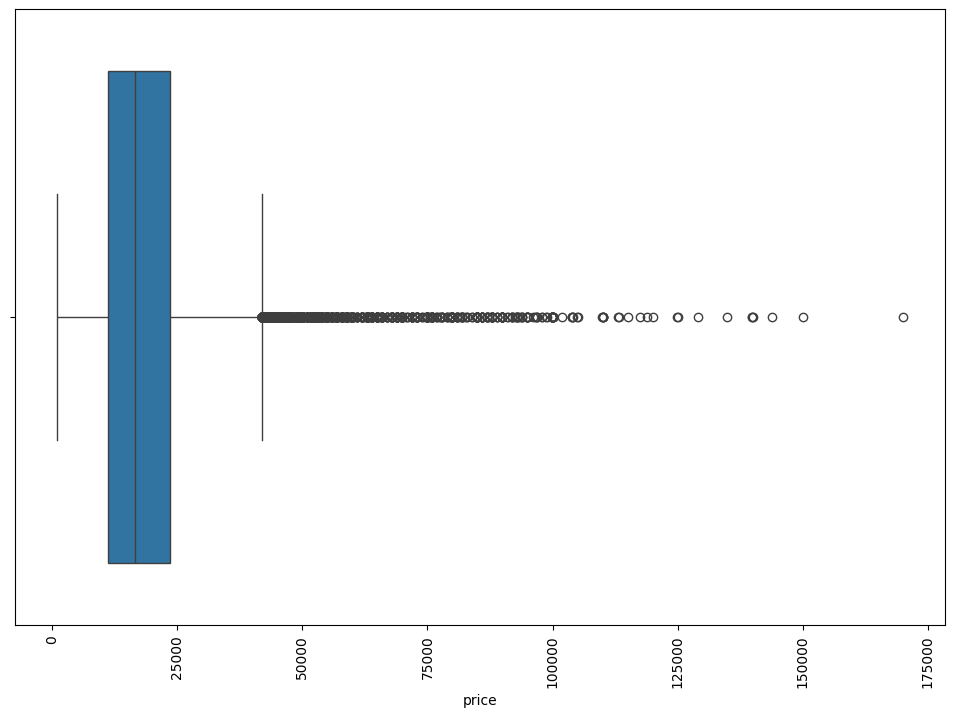

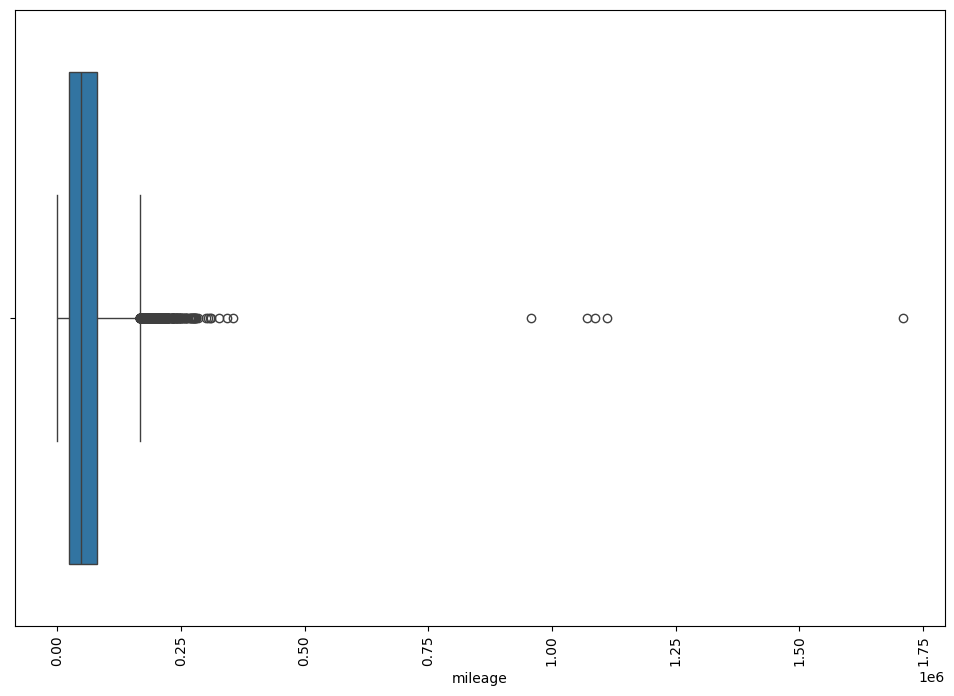

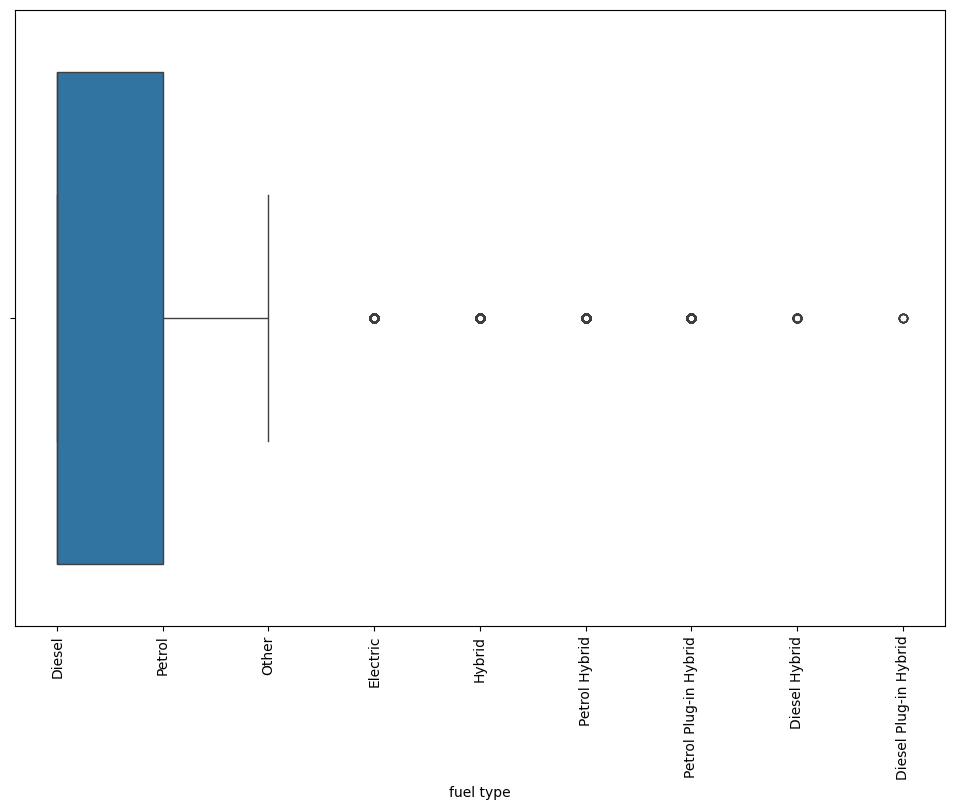

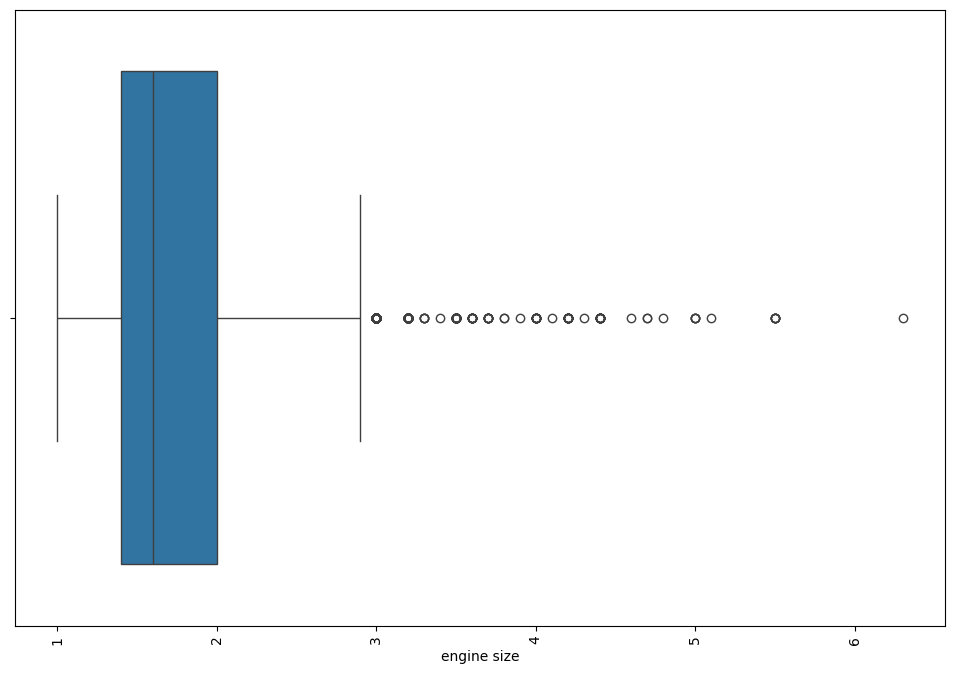

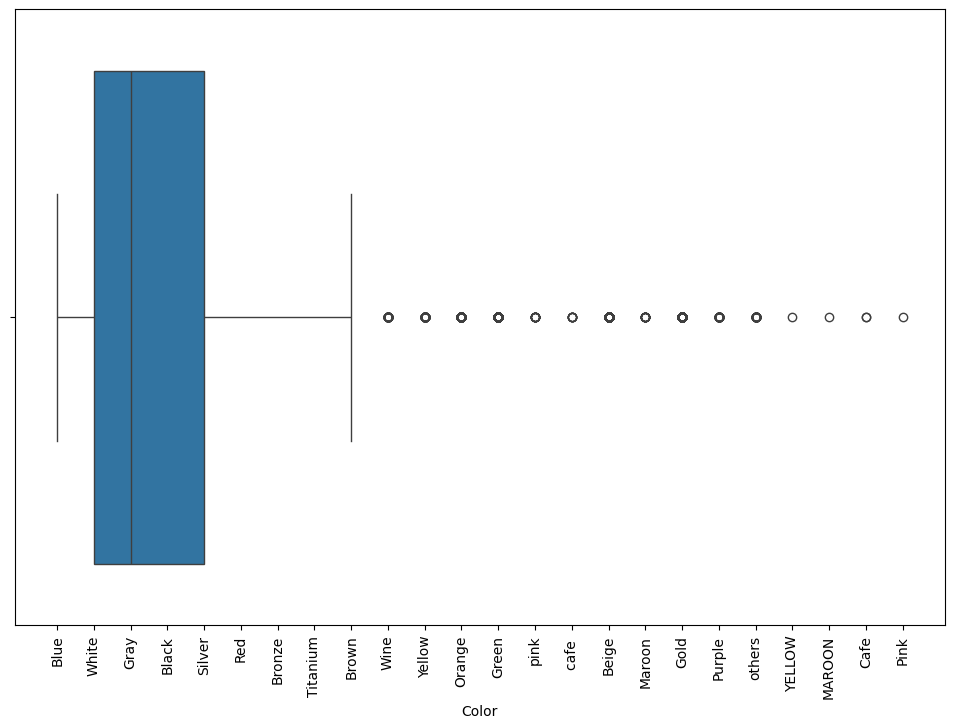

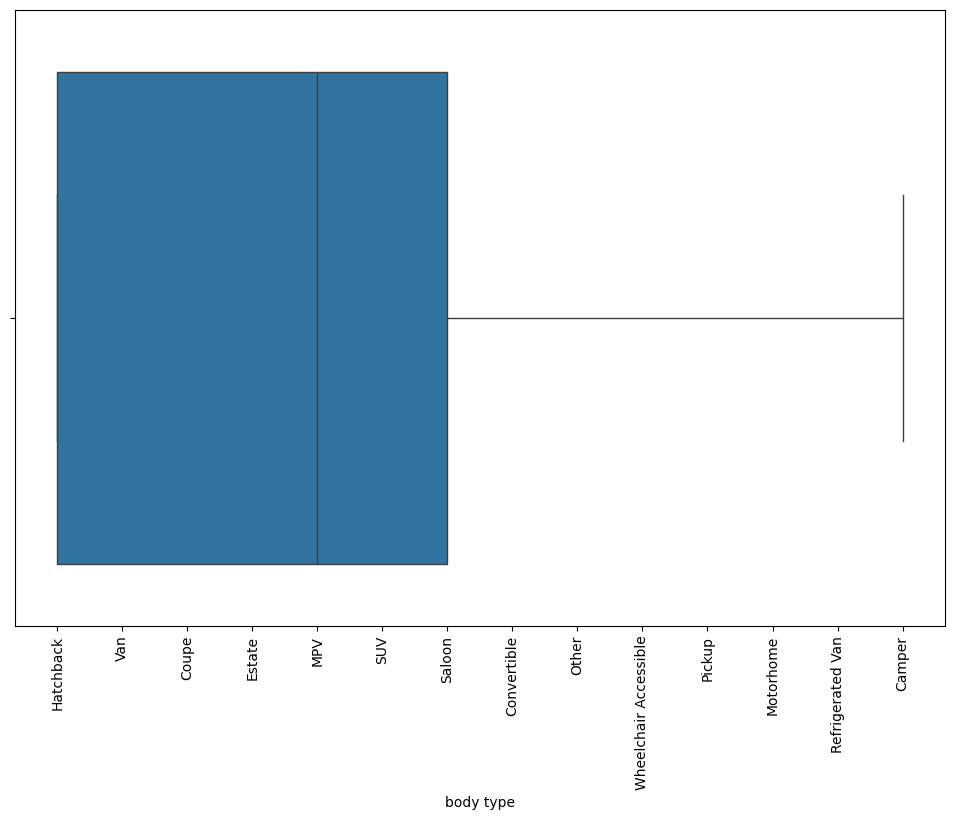

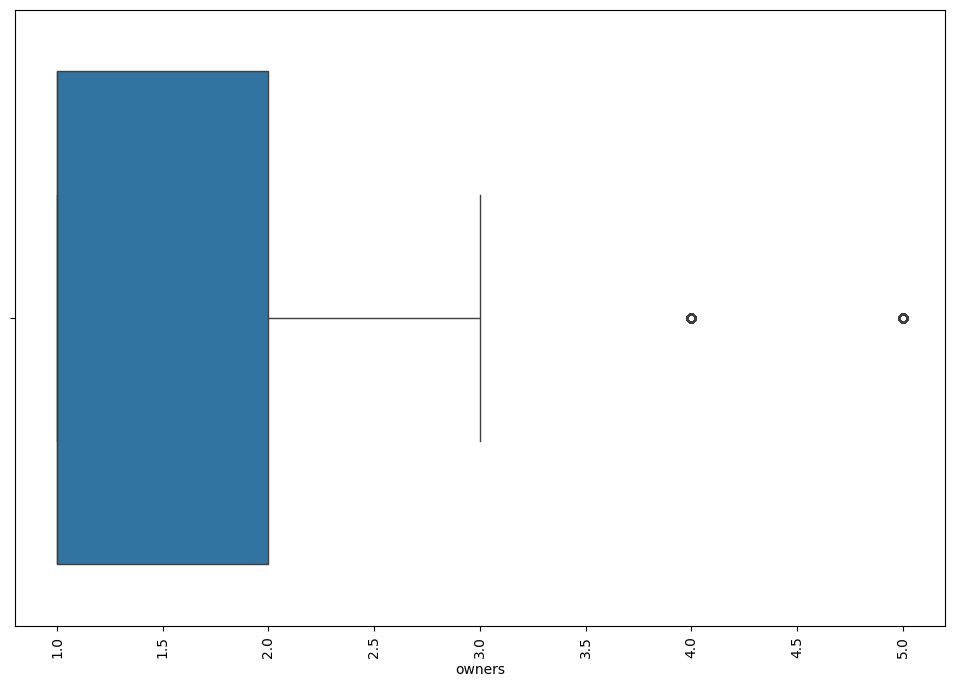

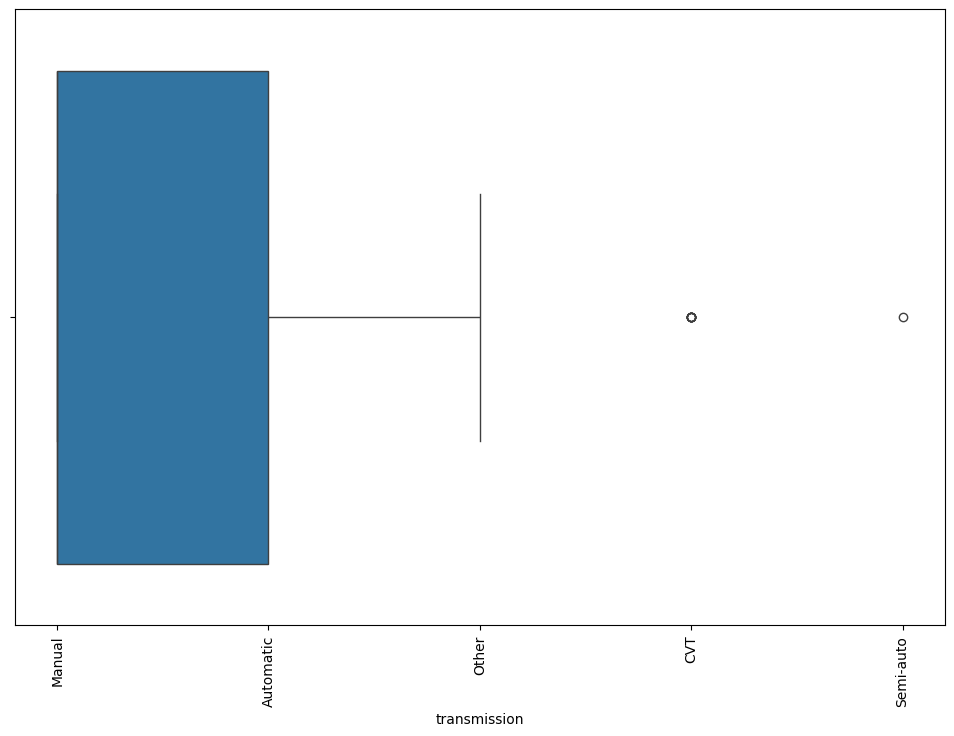

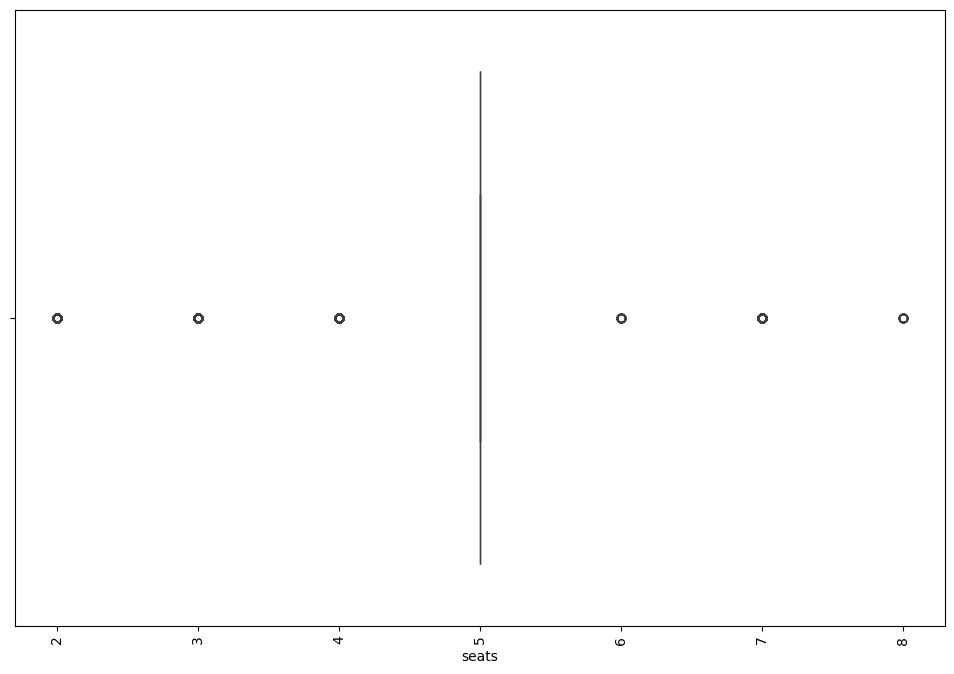

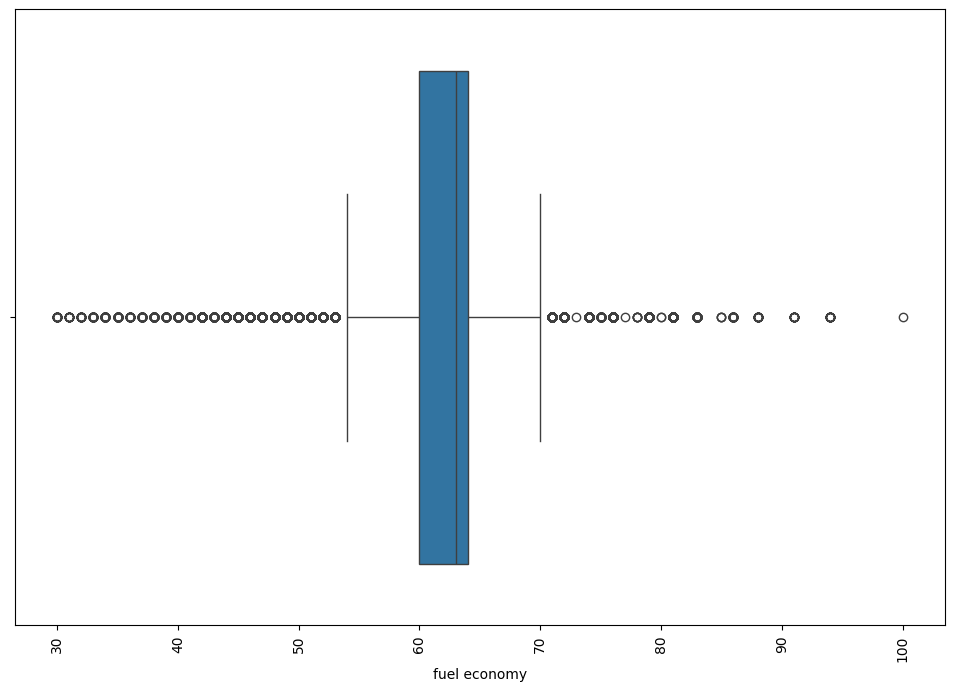

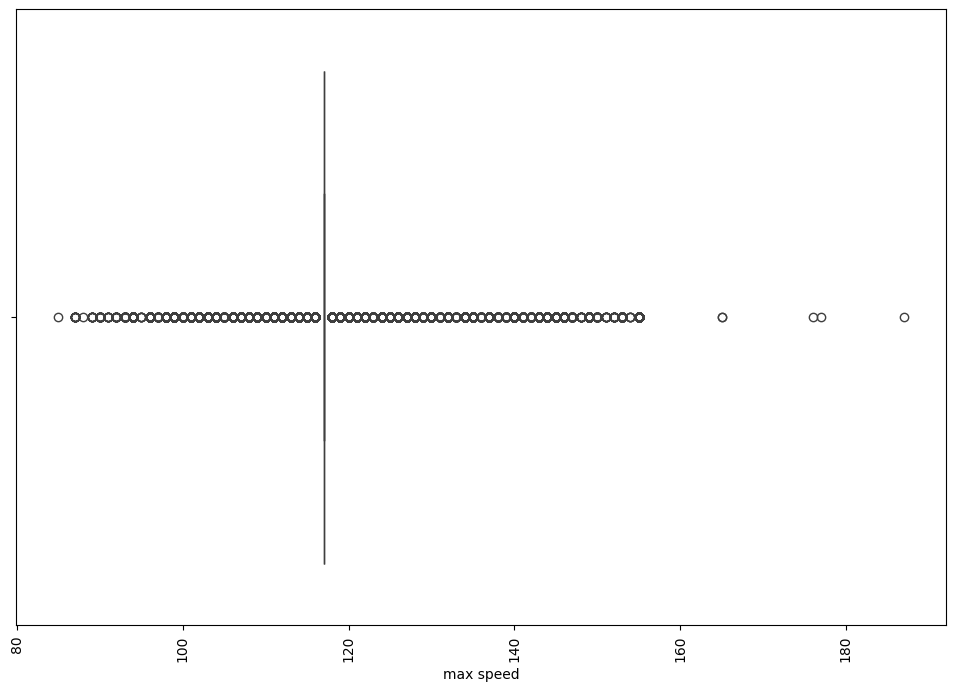

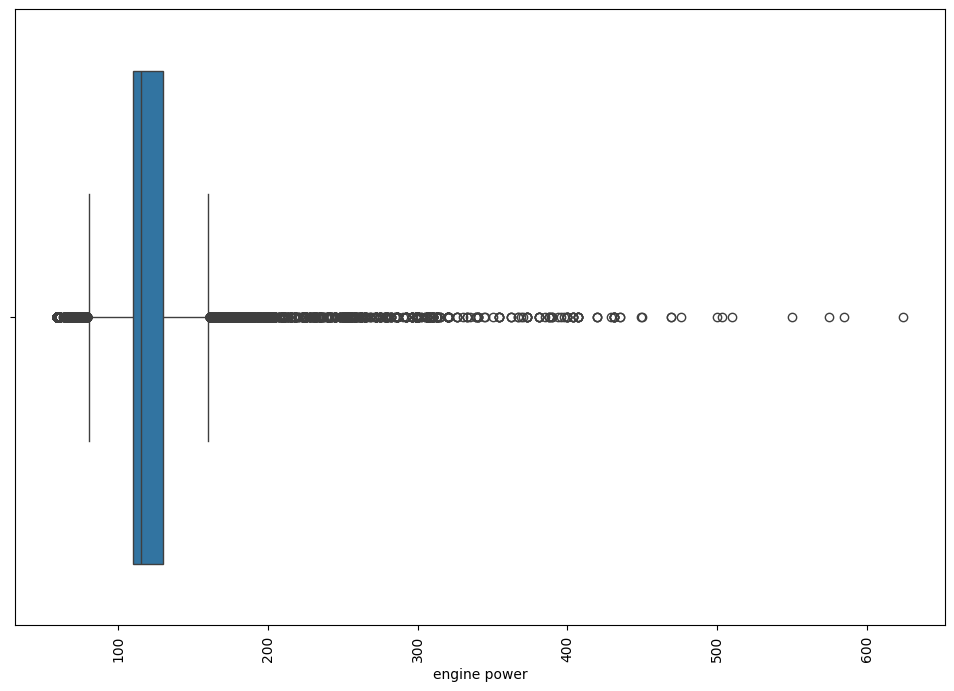

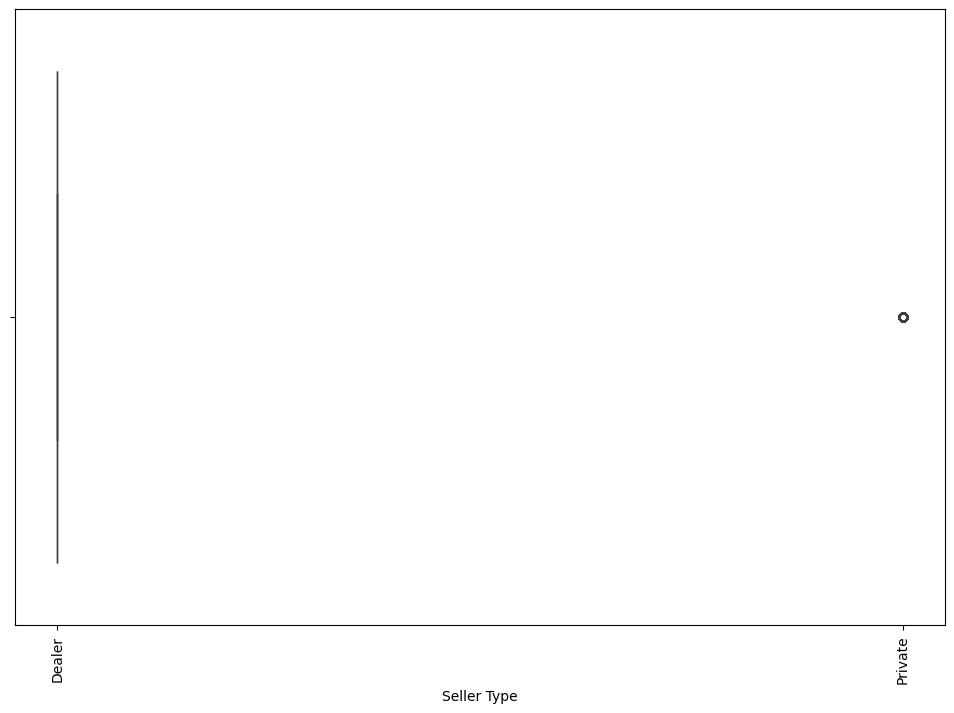

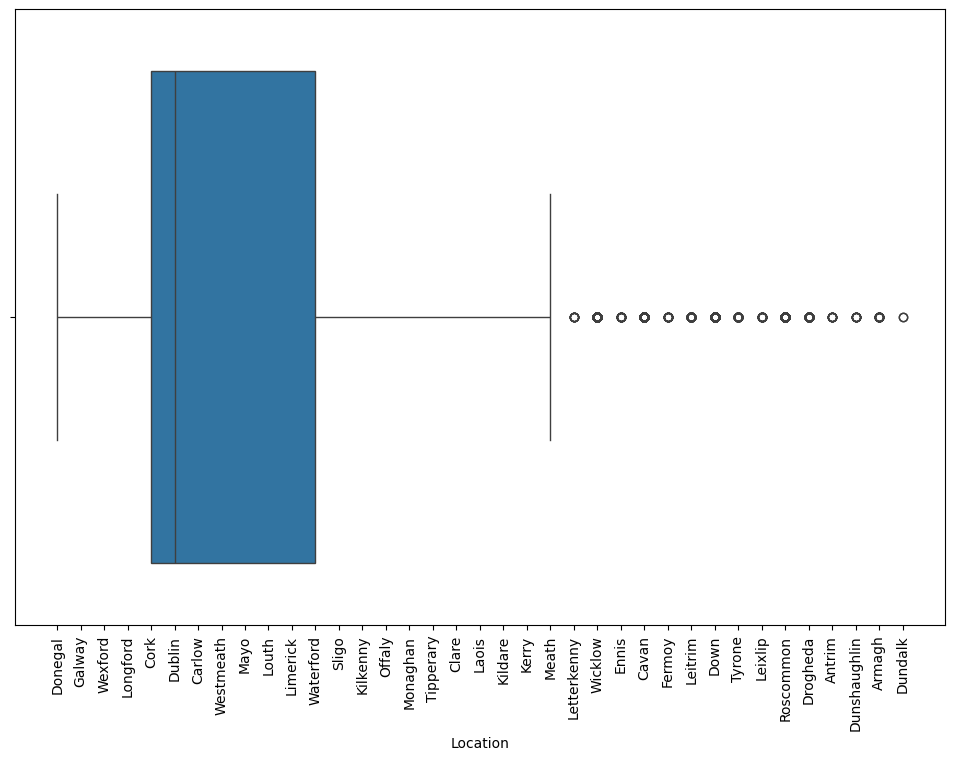

In [36]:

# Lets make a loop which would make the boxplot for each column : 

for column in column_names:
    plt.figure(figsize=(12 ,8))
    sns.boxplot(df[column] , orient='y')
    plt.xticks(rotation = 90)
    plt.show()

Almost all columns has the outliers and we need to remove the outliers before making the model. As the dataframe has some of the columns as the categorical ones then it wont work we need to transform the columns first

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39697 entries, 0 to 46626
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          39697 non-null  object 
 1   model         39697 non-null  object 
 2   year          39697 non-null  int64  
 3   price         39697 non-null  float64
 4   mileage       39697 non-null  float64
 5   fuel type     39697 non-null  object 
 6   engine size   39697 non-null  float64
 7   Color         39697 non-null  object 
 8   body type     39697 non-null  object 
 9   owners        39697 non-null  float64
 10  transmission  39697 non-null  object 
 11  seats         39697 non-null  float64
 12  fuel economy  39697 non-null  float64
 13  max speed     39697 non-null  float64
 14  engine power  39697 non-null  float64
 15  Seller Type   39697 non-null  object 
 16  Location      39697 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 6.5+ MB


In [38]:
label_encoder  = LabelEncoder()
column_names  = df.columns

for col in column_names:
    df[col] = label_encoder.fit_transform(df[col])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39697 entries, 0 to 46626
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   make          39697 non-null  int64
 1   model         39697 non-null  int64
 2   year          39697 non-null  int64
 3   price         39697 non-null  int64
 4   mileage       39697 non-null  int64
 5   fuel type     39697 non-null  int64
 6   engine size   39697 non-null  int64
 7   Color         39697 non-null  int64
 8   body type     39697 non-null  int64
 9   owners        39697 non-null  int64
 10  transmission  39697 non-null  int64
 11  seats         39697 non-null  int64
 12  fuel economy  39697 non-null  int64
 13  max speed     39697 non-null  int64
 14  engine power  39697 non-null  int64
 15  Seller Type   39697 non-null  int64
 16  Location      39697 non-null  int64
dtypes: int64(17)
memory usage: 6.5 MB


In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [41]:
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [42]:
df_no_outliers.shape

(13577, 17)

In [43]:
# Lets make the scaler fit transform for the whole dataset : 
original_columns  = df.columns
features = df_no_outliers.columns
scaler = StandardScaler()
df_no_outliers = scaler.fit_transform(df_no_outliers[features])

print(original_columns)

Index(['make', 'model', 'year', 'price', 'mileage', 'fuel type', 'engine size',
       'Color', 'body type', 'owners', 'transmission', 'seats', 'fuel economy',
       'max speed', 'engine power', 'Seller Type', 'Location'],
      dtype='object')


In [44]:
# Make the correlation matrix for the whole dataset  : 
df_no_outliers = pd.DataFrame(df_no_outliers , columns=original_columns)

In [45]:
df_no_outliers.head()

make     model      year     price   mileage  fuel type  engine size  \
0  0.685200 -1.787581 -0.638544 -1.068269 -0.082058  -0.753140    -0.288047   
1 -1.547421 -1.757359 -2.509959 -1.368437  0.928298  -0.753140     0.944792   
2 -1.547421 -1.757359 -2.135676 -0.978857  1.034005   1.357072    -0.041479   
3 -1.547421 -1.757359 -1.387110 -0.734571  0.601288  -0.753140     0.944792   
4 -1.547421 -1.757359  0.484305  0.486857 -0.453056  -0.753140    -0.288047   

      Color  body type    owners  transmission  seats  fuel economy  \
0  1.376509  -1.449145 -0.595459      0.597683    0.0       0.10518   
1  1.058387  -0.814374 -0.595459      0.597683    0.0       0.10518   
2 -1.168466  -0.814374  1.129061     -1.670907    0.0       0.10518   
3  0.899326  -0.814374  1.129061      0.597683    0.0       0.10518   
4 -1.168466  -0.814374 -0.595459     -1.670907    0.0       0.10518   

   max speed  engine power  Seller Type  Location  
0        0.0     -0.037453          0.0  2.005068  
1        0.0     -0.037453          0.0 -0.878325  
2        0.0     -0.037453          0.0 -0.580043  
3        0.0     -0.037453          0.0  0.215376  
4        0.0     -0.037453          0.0 -1.276034

In [46]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13577 entries, 0 to 13576
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          13577 non-null  float64
 1   model         13577 non-null  float64
 2   year          13577 non-null  float64
 3   price         13577 non-null  float64
 4   mileage       13577 non-null  float64
 5   fuel type     13577 non-null  float64
 6   engine size   13577 non-null  float64
 7   Color         13577 non-null  float64
 8   body type     13577 non-null  float64
 9   owners        13577 non-null  float64
 10  transmission  13577 non-null  float64
 11  seats         13577 non-null  float64
 12  fuel economy  13577 non-null  float64
 13  max speed     13577 non-null  float64
 14  engine power  13577 non-null  float64
 15  Seller Type   13577 non-null  float64
 16  Location      13577 non-null  float64
dtypes: float64(17)
memory usage: 1.8 MB


In [47]:
correlation  = df_no_outliers.corr()

In [48]:
correlation

make     model      year     price   mileage  fuel type  \
make          1.000000  0.093362  0.018641 -0.076021 -0.019397   0.077593   
model         0.093362  1.000000 -0.023334 -0.040450  0.020118   0.011431   
year          0.018641 -0.023334  1.000000  0.690679 -0.796314   0.155656   
price        -0.076021 -0.040450  0.690679  1.000000 -0.591909  -0.105135   
mileage      -0.019397  0.020118 -0.796314 -0.591909  1.000000  -0.316520   
fuel type     0.077593  0.011431  0.155656 -0.105135 -0.316520   1.000000   
engine size  -0.092948  0.015843 -0.104002  0.409975  0.219778  -0.574122   
Color         0.019683  0.034365 -0.015220 -0.097838 -0.011148   0.058652   
body type    -0.028299  0.014948  0.045221  0.281072  0.008996  -0.245288   
owners       -0.026188  0.022762 -0.516146 -0.361675  0.407884  -0.137008   
transmission  0.062739  0.057302 -0.106377 -0.436967  0.091747  -0.024750   
seats              NaN       NaN       NaN       NaN       NaN        NaN   
fuel economy  0.026618 -0.020059  0.013789 -0.002748  0.034304  -0.094799   
max speed          NaN       NaN       NaN       NaN       NaN        NaN   
engine power -0.028033  0.001209  0.059309  0.124373  0.057112  -0.128621   
Seller Type        NaN       NaN       NaN       NaN       NaN        NaN   
Location     -0.021510  0.009795  0.011783  0.020737  0.010654  -0.095966   

              engine size     Color  body type    owners  transmission  seats  \
make            -0.092948  0.019683  -0.028299 -0.026188      0.062739    NaN   
model            0.015843  0.034365   0.014948  0.022762      0.057302    NaN   
year            -0.104002 -0.015220   0.045221 -0.516146     -0.106377    NaN   
price            0.409975 -0.097838   0.281072 -0.361675     -0.436967    NaN   
mileage          0.219778 -0.011148   0.008996  0.407884      0.091747    NaN   
fuel type       -0.574122  0.058652  -0.245288 -0.137008     -0.024750    NaN   
engine size      1.000000 -0.078775   0.349367  0.066156     -0.356013    NaN   
Color           -0.078775  1.000000  -0.048210  0.011917      0.041653    NaN   
body type        0.349367 -0.048210   1.000000  0.026895     -0.102052    NaN   
owners           0.066156  0.011917   0.026895  1.000000      0.111112    NaN   
transmission    -0.356013  0.041653  -0.102052  0.111112      1.000000    NaN   
seats                 NaN       NaN        NaN       NaN           NaN    NaN   
fuel economy     0.046033 -0.014217  -0.012874 -0.006908      0.010185    NaN   
max speed             NaN       NaN        NaN       NaN           NaN    NaN   
engine power     0.236238 -0.014713   0.137717 -0.078330     -0.053686    NaN   
Seller Type           NaN       NaN        NaN       NaN           NaN    NaN   
Location         0.053387 -0.009332   0.043019  0.053117      0.029964    NaN   

              fuel economy  max speed  engine power  Seller Type  Location  
make              0.026618        NaN     -0.028033          NaN -0.021510  
model            -0.020059        NaN      0.001209          NaN  0.009795  
year              0.013789        NaN      0.059309          NaN  0.011783  
price            -0.002748        NaN      0.124373          NaN  0.020737  
mileage           0.034304        NaN      0.057112          NaN  0.010654  
fuel type        -0.094799        NaN     -0.128621          NaN -0.095966  
engine size       0.046033        NaN      0.236238          NaN  0.053387  
Color            -0.014217        NaN     -0.014713          NaN -0.009332  
body type        -0.012874        NaN      0.137717          NaN  0.043019  
owners           -0.006908        NaN     -0.078330          NaN  0.053117  
transmission      0.010185        NaN     -0.053686          NaN  0.029964  
seats                  NaN        NaN           NaN          NaN       NaN  
fuel economy      1.000000        NaN      0.028315          NaN  0.010372  
max speed              NaN        NaN           NaN          NaN       NaN  
engine power     

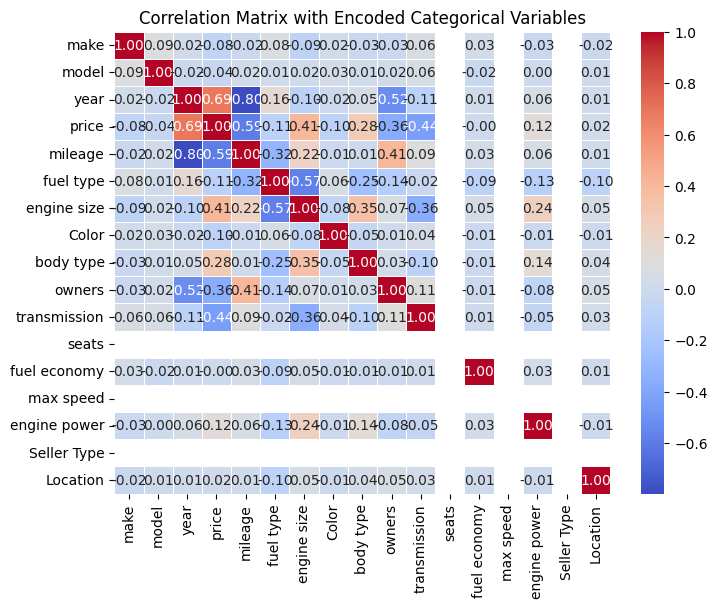

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Encoded Categorical Variables")
plt.show()

8. Make the model -  Linear Regression and Random Forest we would try two approach for the model. If the regresison model is not possible then would make the classification Model.

In [50]:
X = df_no_outliers.drop(columns=['price']) 
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Feature       VIF
0           make  1.022702
1          model  1.017819
2           year  3.290073
3        mileage  3.127004
4      fuel type  1.771003
5    engine size  2.094909
6          Color  1.009629
7      body type  1.164485
8         owners  1.391246
9   transmission  1.298869
10         seats       NaN
11  fuel economy  1.015493
12     max speed       NaN
13  engine power  1.095980
14   Seller Type       NaN
15      Location  1.016086


In [51]:
pca = PCA()
pca.fit(df_no_outliers)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
components = np.arange(1, len(explained_variance) + 1)

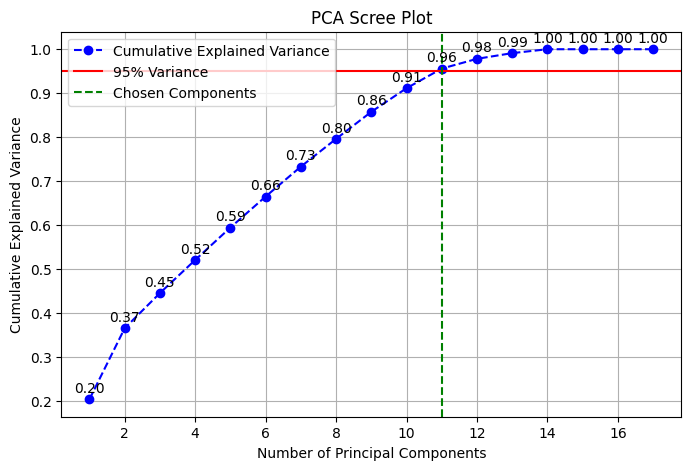

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(components, explained_variance, marker='o', linestyle='--', color='b', label="Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')

plt.axhline(y=0.95, color='r', linestyle='-', label="95% Variance")  
plt.axvline(x=np.argmax(explained_variance >= 0.95) + 1, color='g', linestyle='--', label="Chosen Components")

for i, txt in enumerate(explained_variance):
    plt.annotate(f"{txt:.2f}", (components[i], explained_variance[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.legend()
plt.grid()
plt.show()

In [53]:
y = df_no_outliers['price']
x = df_no_outliers[['make', 'model', 'fuel type', 'Color', 'body type','owners', 'transmission', 'fuel economy', 'engine power', 'Location']]

In [54]:
y.head()

0   -1.068269
1   -1.368437
2   -0.978857
3   -0.734571
4    0.486857
Name: price, dtype: float64

In [55]:
x.head()

make     model  fuel type     Color  body type    owners  transmission  \
0  0.685200 -1.787581  -0.753140  1.376509  -1.449145 -0.595459      0.597683   
1 -1.547421 -1.757359  -0.753140  1.058387  -0.814374 -0.595459      0.597683   
2 -1.547421 -1.757359   1.357072 -1.168466  -0.814374  1.129061     -1.670907   
3 -1.547421 -1.757359  -0.753140  0.899326  -0.814374  1.129061      0.597683   
4 -1.547421 -1.757359  -0.753140 -1.168466  -0.814374 -0.595459     -1.670907   

   fuel economy  engine power  Location  
0       0.10518     -0.037453  2.005068  
1       0.10518     -0.037453 -0.878325  
2       0.10518     -0.037453 -0.580043  
3       0.10518     -0.037453  0.215376  
4       0.10518     -0.037453 -1.276034

In [56]:
# Lets split the data in train test split and then make the model : 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [57]:
# Lets make some regresison models for the above defined x and y as we know x is the independent featues and y are the dependent features 
# Before that defined a function for testing the efficiency and printing the same : 
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Metrics")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))


In [58]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [59]:
y_pred_lr = linear_regression_model.predict(X_test)
print_metrics(y_test, y_pred_lr, "Linear Regression")


Linear Regression Metrics
MAE : 0.645638640405514
MSE : 0.6298395585260343
RMSE: 0.7936243182552021
R²  : 0.3788090149113743


In [60]:
# Lets check the equation predicted using the linear regresison model: 
coefficients = linear_regression_model.coef_
intercept = linear_regression_model.intercept_
feature_names = X_train.columns

equation = f"price = {intercept:.2f}"
for coef, feature in zip(coefficients, feature_names):
    equation += f" + ({coef:.2f} * {feature})"

print(equation)

price = -0.00 + (-0.04 * make) + (-0.01 * model) + (-0.10 * fuel type) + (-0.06 * Color) + (0.22 * body type) + (-0.34 * owners) + (-0.36 * transmission) + (-0.01 * fuel economy) + (0.03 * engine power) + (0.03 * Location)


In [61]:
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [62]:
y_pred_ = random_forest_model.predict(X_test)
print_metrics(y_test , y_pred_ , random_forest_model)


RandomForestRegressor(n_estimators=50, random_state=42) Metrics
MAE : 0.40232296597294975
MSE : 0.30028679670823427
RMSE: 0.5479843033411033
R²  : 0.7038365588010529


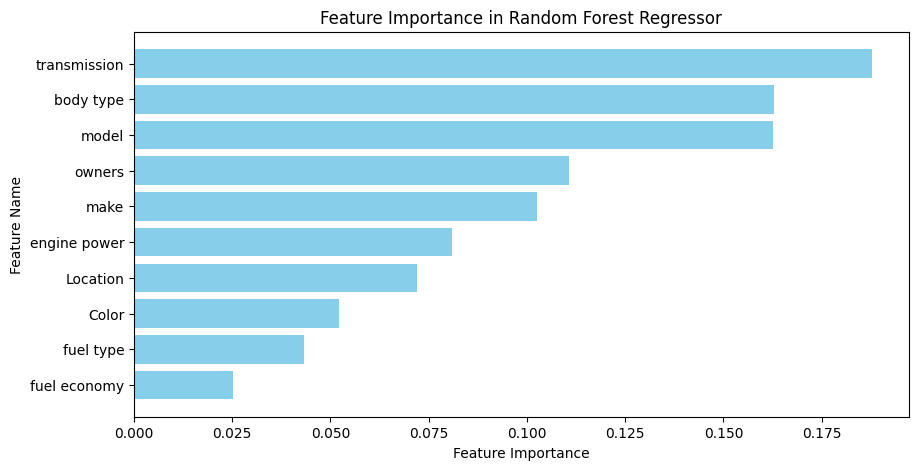

In [63]:
feature_importance = random_forest_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest Regressor")
plt.gca().invert_yaxis() 
plt.show()


In [64]:
from sklearn.tree import export_text

tree = random_forest_model.estimators_[0]


tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- transmission <= -1.10
|   |--- body type <= -0.18
|   |   |--- fuel type <= -0.23
|   |   |   |--- engine power <= -0.19
|   |   |   |   |--- owners <= 0.27
|   |   |   |   |   |--- body type <= -0.97
|   |   |   |   |   |   |--- value: [1.03]
|   |   |   |   |   |--- body type >  -0.97
|   |   |   |   |   |   |--- fuel economy <= -1.86
|   |   |   |   |   |   |   |--- value: [0.80]
|   |   |   |   |   |   |--- fuel economy >  -1.86
|   |   |   |   |   |   |   |--- model <= -1.27
|   |   |   |   |   |   |   |   |--- value: [0.61]
|   |   |   |   |   |   |   |--- model >  -1.27
|   |   |   |   |   |   |   |   |--- engine power <= -2.10
|   |   |   |   |   |   |   |   |   |--- Color <= -0.06
|   |   |   |   |   |   |   |   |   |   |--- value: [-0.03]
|   |   |   |   |   |   |   |   |   |--- Color >  -0.06
|   |   |   |   |   |   |   |   |   |   |--- value: [-0.21]
|   |   |   |   |   |   |   |   |--- engine power >  -2.10
|   |   |   |   |   |   |   |   |   |--- body type <= -0.66
|

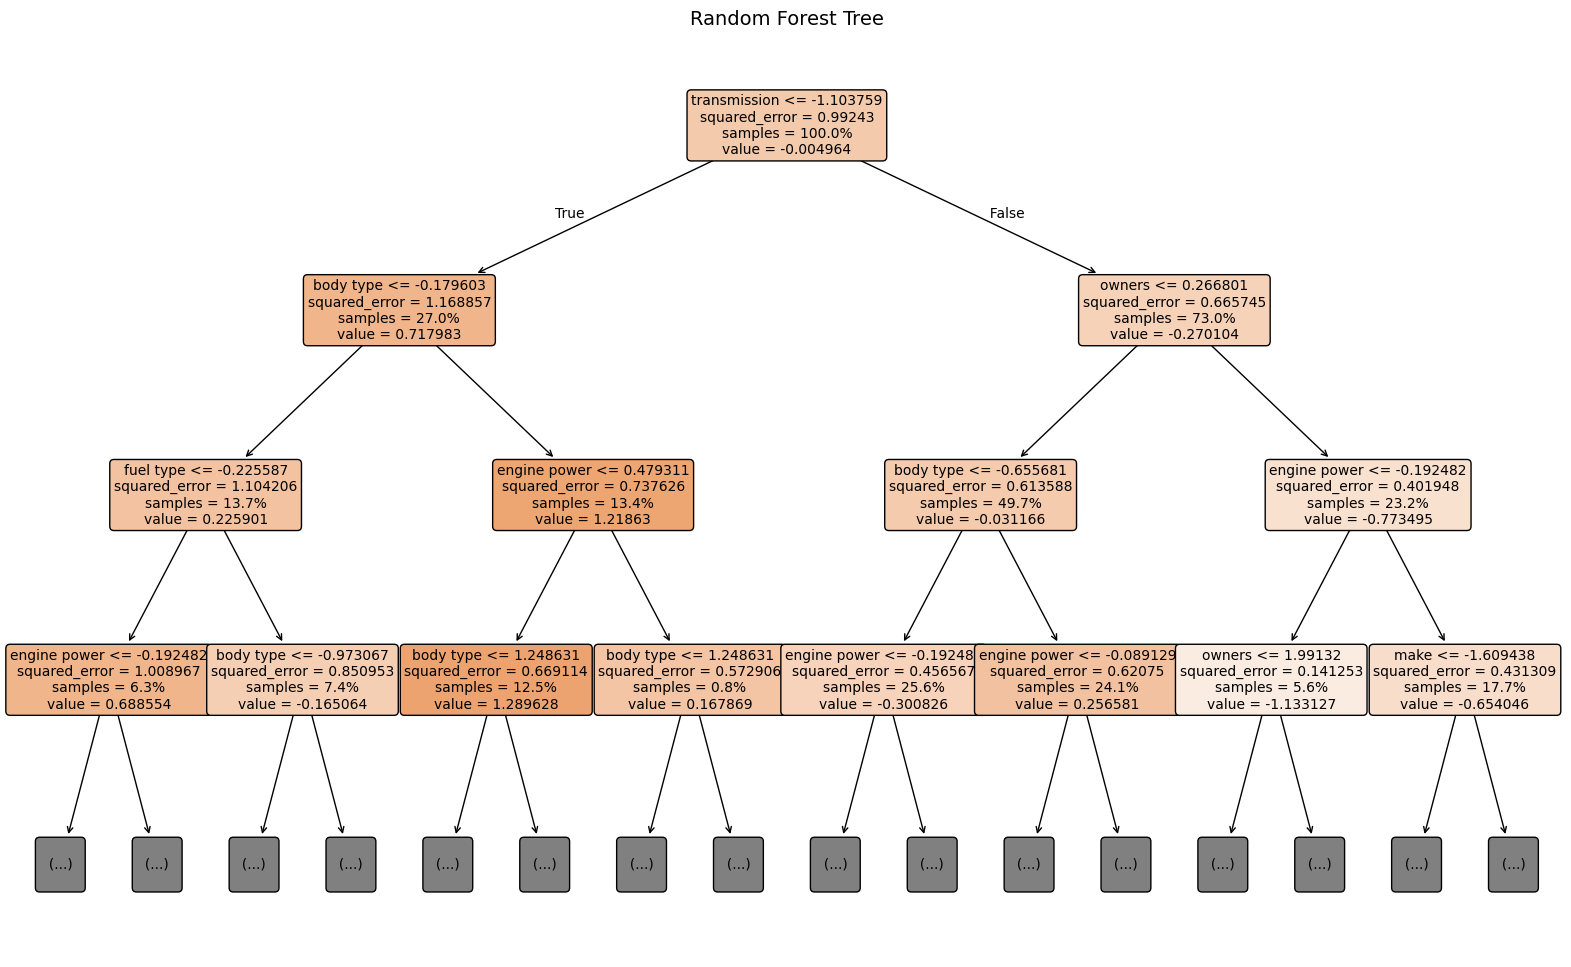

In [65]:

from sklearn.tree import plot_tree
tree = random_forest_model.estimators_[0]

plt.figure(figsize=(20, 12))
plot_tree(
    tree,feature_names=X_train.columns,filled=True,rounded=True,max_depth=3,proportion=True,precision=6,fontsize=10)
plt.title("Random Forest Tree", fontsize=14)
plt.show()

In [66]:
#  Lets save the model for the reference : and make a predeciton based on the model done : 
import joblib
joblib.dump(random_forest_model, "random_forest_classifier.pkl")


['random_forest_classifier.pkl']